Uploaded for the sake of uploading

In [9]:
import pandas as pd
import pyarrow
from dotenv import load_dotenv
import os

load_dotenv()

file_path = os.getenv('FILE_PATH')

filenames = [
    'bag_ids_no_funda',
    'random_online_sample',
    'special_house_types_class_sample',
    'detailed_woning_type_sample',
    'not_online_listings', # Download from slack
]

In [10]:
print(file_path)

../../Samsung_USB/


In [11]:
for filename in filenames:
    filename = filename + '.parquet' if not filename.endswith('.parquet') else filename	
    df = pd.read_parquet(file_path + filename, engine='pyarrow')
    df.to_csv(
        file_path + filename.replace('.parquet', '.csv'),
        index=False,
        encoding='utf-8',
    )

In [12]:
print(filenames)

# When printing the content of the CSV files, the file size becomes too large to be pushed to GitHub.

# for filename in filenames:
#     filename = filename + '.csv' if not filename.endswith('.csv') else filename
#     print(f"Reading file: {filename}")
#     with open(file_path + filename, 'r', encoding='utf-8') as file:
#         content = file.read()
#         print(content)

['bag_ids_no_funda', 'random_online_sample', 'special_house_types_class_sample', 'detailed_woning_type_sample', 'not_online_listings']


In [71]:
import pandas as pd

df = pd.read_csv(file_path + "bag_image_summary.csv")
df_sample = pd.read_parquet(file_path + "detailed_woning_type_sample.parquet")
df = pd.read_csv(file_path + "bag_image_summary.csv", dtype="string")
df_joined = pd.merge(df_sample, df, how="left", right_on="bag_id", left_on="bag_nummeraanduidingid")
df_sample_with_urls = df_joined[df_joined["frontview_exists"].notna()]

file_path_with_urls = False


In [72]:
import re

def extract_path_funda(url):
    if pd.isna(url):
        return ''
    id = url.rstrip('/').split('/')[-1]
    id , _ = id.split('.')
    m = re.match(r'(\d{2})', id)
    first_two_digits = m.group(1) if m else ''
    return f"img_dataset/{first_two_digits}/{id}-funda.jpg"

def extract_path_google(url):
    if pd.isna(url):
        return ''
    id = url.rstrip('/').split('/')[-1]
    id , _ = id.split('.')
    m = re.match(r'(\d{2})', id)
    first_two_digits = m.group(1) if m else ''
    return f"img_dataset/{first_two_digits}/{id}-google.jpg"

def extract_path_funda_in_business(url):
    if pd.isna(url):
        return ''
    id = url.rstrip('/').split('/')[-1]
    id , _ = id.split('.')
    m = re.match(r'(\d{2})', id)
    first_two_digits = m.group(1) if m else ''
    return f"img_dataset/{first_two_digits}/{id}-funda-in-business.jpg"

cols = ['frontview_funda_url', 'frontview_google_url', 'frontview_funda_in_business_url']
df_sample_with_urls['frontview_funda_url_split'] = df_sample_with_urls['frontview_funda_url'].map(extract_path_funda)
df_sample_with_urls['frontview_google_url_split'] = df_sample_with_urls['frontview_google_url'].map(extract_path_google)
df_sample_with_urls['frontview_funda_in_business_url_split'] = df_sample_with_urls['frontview_funda_in_business_url'].map(extract_path_funda_in_business)

df_sample_with_urls.to_csv(
    file_path + "detailed_woning_type_with_urls.csv",
    index=False,
    encoding='utf-8',
)

                           frontview_funda_url_split  \
0  ../../Samsung_USB/img_dataset/03/0375200000007...   
1  ../../Samsung_USB/img_dataset/02/0241200000062...   
2  ../../Samsung_USB/img_dataset/02/0202200000330...   
3  ../../Samsung_USB/img_dataset/07/0797200000023...   
4  ../../Samsung_USB/img_dataset/04/0453200000023...   
5  ../../Samsung_USB/img_dataset/18/1883200000020...   
6  ../../Samsung_USB/img_dataset/16/1655200000536...   
7  ../../Samsung_USB/img_dataset/04/0420200000001...   
8  ../../Samsung_USB/img_dataset/04/0437200000004...   
9  ../../Samsung_USB/img_dataset/03/0394200000006...   

  frontview_google_url_split frontview_funda_in_business_url_split  
0                                                                   
1                                                                   
2                                                                   
3                                                                   
4                                     

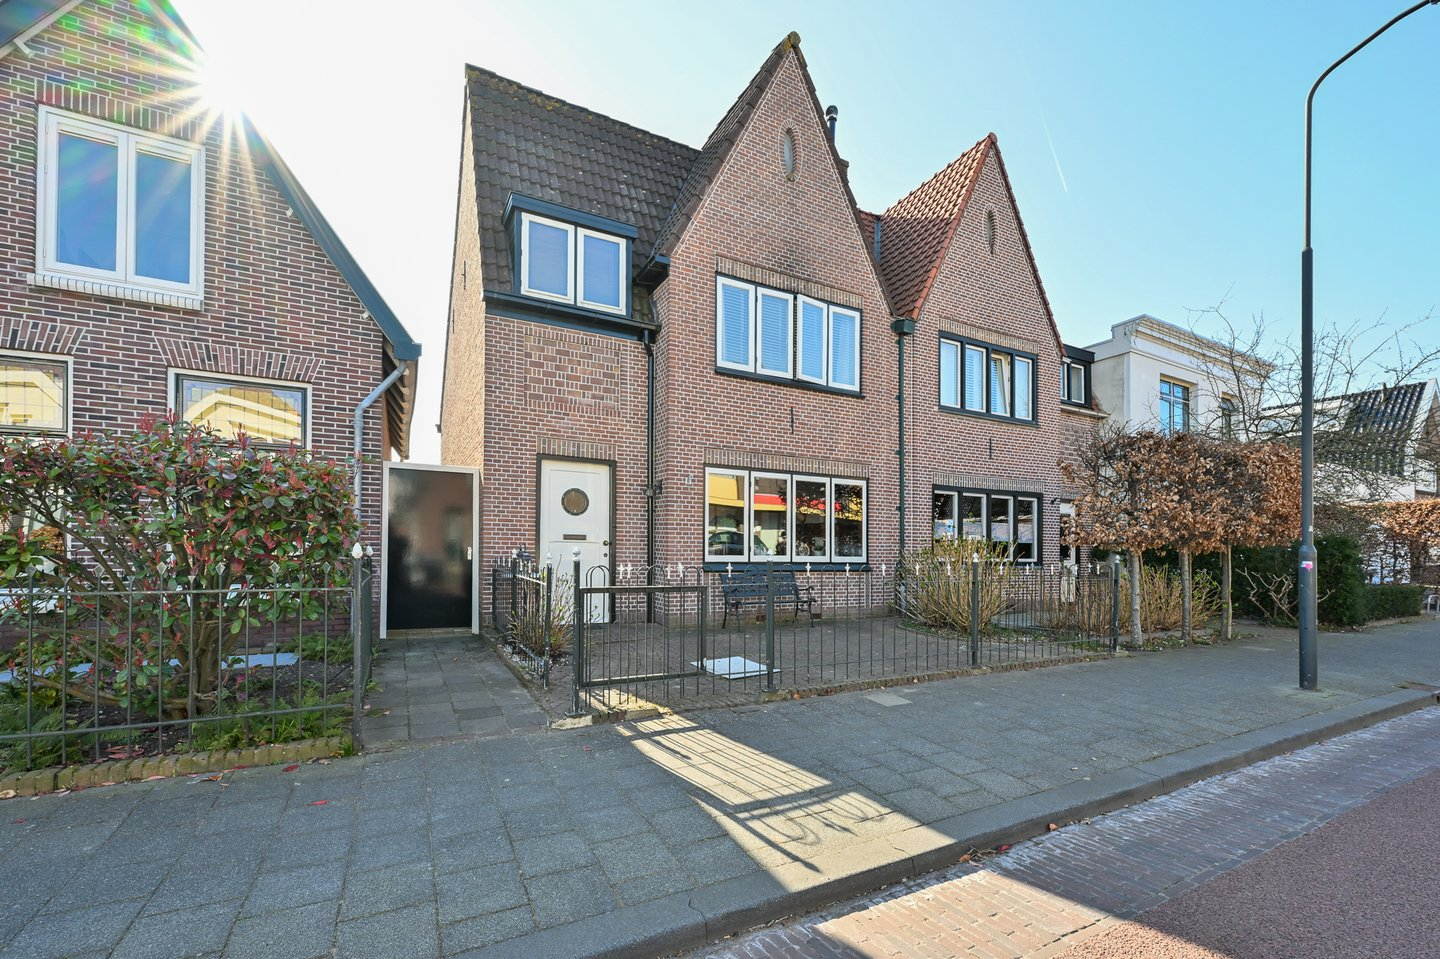

In [ ]:
if file_path_with_urls == False:
    df_sample_with_urls[[f'{col}_split' for col in cols]] = df_sample_with_urls[[f'{col}_split' for col in cols]].map(lambda x: file_path + x if x else '')
    file_path_with_urls = True

df_sample_with_urls.to_csv(
    file_path + "detailed_woning_type_with_urls_full.csv",
    index=False,
    encoding='utf-8',
)
